In [1]:
#first we gonna import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#then we gonna train our model so to do it we going to read the csv first
#This csv file is usually for multivariable model but i am gonna used only do columns from it area and price
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,area,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,01-07-14,276000,1,1,370,1801,1,0,0,5,370,0,1923,0,2508 NW 67th St,Seattle,WA 98117,USA
1,20-06-14,245000,1,1,380,15000,1,0,0,3,380,0,1963,2008,13602 8th Ave S,Burien,WA 98168,USA
2,12-06-14,280000,1,1,420,6720,1,0,0,3,420,0,1922,2008,5550 17th Ave S,Seattle,WA 98108,USA
3,23-05-14,80000,1,1,430,5050,1,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA
4,09-07-14,150000,3,1,490,38500,2,0,0,4,490,0,1959,0,11881 Tye River Rd NE,Skykomish,WA 98288,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,02-07-14,0,5,6,8020,21738,2,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,WA 98006,USA
4596,11-06-14,2888000,5,6,8670,64033,2,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
4597,17-06-14,4668000,5,7,9640,13068,1,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
4598,11-06-14,7062500,5,5,10040,37325,2,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA


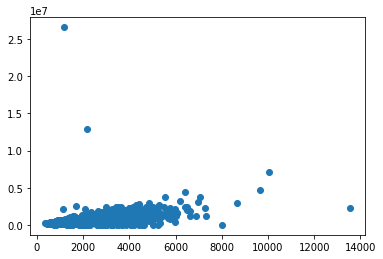

In [3]:
#let's just plot the area and price
plt.scatter(df.area,df.price)

In [4]:
#now we are going to train the model 
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [5]:
#now we are going to test the model if it's working as we want it to
reg.predict([[3000]])

c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([768804.63652834])

In [6]:
#so as we linearregression model
#price = slope or gradient * area for which we want to predict + intercept
slope = reg.coef_

In [7]:
intercept = reg.intercept_

In [8]:
price = slope*3000+intercept
price

array([768804.63652834])

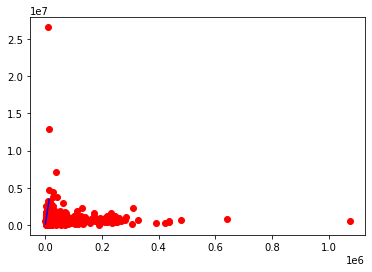

In [30]:
#here we are going to show the prediction model look like
plt.scatter(df.sqft_lot,df.price,color = 'red')
plt.plot(df.area,reg.predict(df[['area']]),color = 'blue')

In [31]:
#Now we are going to use this model for an another csv file to test it for a large amount of areas
test = pd.read_csv("testt.csv")

In [32]:
test.head(3)

,area
0,1500
1,4500
2,4625


In [33]:
predicted_prices = reg.predict(test)

In [34]:
test['price'] = predicted_prices
test.head(3)

,area,price
0,1500,3.908794e+05
1,4500,1.146730e+06
2,4625,1.178224e+06


In [35]:
test.to_csv('predictedmodel.csv',index=False)

In [36]:
#so as we can the csv file predictedmodel is generated succesfully
predmodel = pd.read_csv('predictedmodel.csv')
predmodel

,area,price
0,1500,3.908794e+05
1,4500,1.146730e+06
2,4625,1.178224e+06
3,1780,4.614255e+05
4,2390,6.151151e+05
5,1470,3.833209e+05
6,2567,6.597102e+05
7,1290,3.379699e+05
8,7531,1.910391e+06
9,1463,3.815573e+05


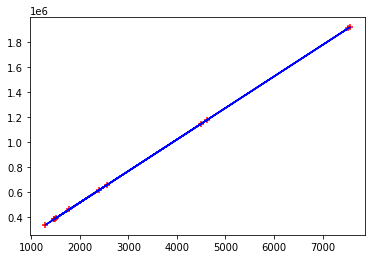

In [37]:
plt.scatter(test.area,test.price,color='red',marker = '+')
plt.plot(test.area,reg.predict(test[['area']]),color='blue')